In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt 


# Mnist

This is a custom made version of mnist, with 4000 images of zeros and 4000 images of ones. Their values go from 0 to 255, first thing we will do is scale them to 0-1 dividing by 255. 

In [8]:
images = torch.load('datasets/mnist_images.pt')/255
labels = torch.load('datasets/mnist_labels.pt')

print(labels[0])
plt.imshow(images[0])
plt.show()
print(labels[4000])
plt.imshow(images[4000])
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'datasets/mnist_images.pt'

Now that we loaded our images, we need to flatten them to correctly use them in a neural network. Shape (784, ) is far easier to deal with than (28, 28)

In [ ]:
images = images.view(-1, 28*28)

# Perceptron
This complex dataset requires us to use something more elaborate, we will build on logistic regression to make an architecture that can deal with this kind of data 
You can recall logistic regression having two trained parameters, m and q. Turns out that we can just scale that up for all of our input values, sum the results up and apply an activation function: 

Remember: images have size (DATASET_SIZE, 784) <br>
pred1 = images1 * m1 + q1  <br>
pred2 = images2 * m2 + q2 <br>
pred3 = images3 * m3 + q3 <br>
...  <br>
predn = imagesn * mn + qn <br>

and then we sum up preds like this:  <br>
(m1 * images1 + m2 * images2 + m3 * images3 + q3 ... mn * imagesn) + (q1 + q2 + q3 ... qn) <br>

actually it turns out that these two terms can be greatly simplified, the first is none other than a dot product (@ in python) and the sum of qs can be reduced to a single q value that holds the same information

The simplified formula for the perceptron is the following (without activation): <br>
**pred = images @ m + q**

In [147]:
# Parameters
m = torch.randn(784).requires_grad_()
q = torch.randn(1).requires_grad_()

# Training hyperparameters 
epochs = 1500
lr = 1e-2

# Training loop
for epoch in range(epochs):
    # Forward pass
    pred = F.sigmoid(images @ m + q)  # formula for perceptron with sigmoid activation
    loss = F.mse_loss(pred, labels)

    # Backward pass
    loss.backward()
    with torch.no_grad():
        m -= lr * m.grad
        q -= lr * q.grad
        m.grad = None
        q.grad = None
    
    # Print loss every 10% of epochs
    if epoch % (epochs//10) == 0:
        print(f'Epoch {epoch}/{epochs} - Loss: {loss.item()} - Accuracy: {round(((pred.round() == labels).sum().item()/len(labels))*100)}%')

Epoch 0/1500 - Loss: 0.5135847330093384 - Accuracy: 42%


Epoch 150/1500 - Loss: 0.43829619884490967 - Accuracy: 50%
Epoch 300/1500 - Loss: 0.3767104148864746 - Accuracy: 57%
Epoch 450/1500 - Loss: 0.318894624710083 - Accuracy: 63%
Epoch 600/1500 - Loss: 0.26526182889938354 - Accuracy: 69%
Epoch 750/1500 - Loss: 0.21420571208000183 - Accuracy: 74%
Epoch 900/1500 - Loss: 0.17074503004550934 - Accuracy: 79%
Epoch 1050/1500 - Loss: 0.13863205909729004 - Accuracy: 83%
Epoch 1200/1500 - Loss: 0.115546815097332 - Accuracy: 86%
Epoch 1350/1500 - Loss: 0.09889500588178635 - Accuracy: 88%


# What's a dot product
Yes, we came up with the perceptron as a scaled up logistic regressor, but the dot product has a deeper meaning in linear algebra. 
This is the other formula for the dot product: |u||v|cosθ. <br>
Intrinsically in the dot product is the cos of the angle between the vectors, representing their similarity. It stands to reason that a set of ms correctly trained to recognize zeros, should have high similarity with zeros and low with ones.  

Let's say we have three vectors: <br>
a = [0, 1, 2] <br>
b = [2, 0, 0] <br>
c = [0, 2, 4] <br>


| Equation       | Similarity  | Angle  | Explanation                           |
|----------------|-------------|--------|---------------------------------------|
| a @ a = 5      | High        | 0°     | High similarity because the angle is zero |
| a @ -a = -5    | Opposite    | 180°   | Opposite similarity because the angle is 180° |
| a @ b = 0      | Zero        | 90°    | Zero similarity because the angle between them is 90° |
| a @ c = 10     | Really High | 0°     | Really high similarity because of zero angle and high values |


In [ ]:
# Don't believe me? take a look at the trained weights 
plt.imshow(m.view(28, 28).detach())

# Loading in batches 

This is taking a while, we cant train like this... Doing a forward and backward pass on the complete dataset is slow, let's see if we can make more approximate step that's good enough by using a subset of our data in each epoch

In [148]:
m = torch.randn(784).requires_grad_()
q = torch.randn(1).requires_grad_()

epochs = 4500 # roughly 3x the number of epochs 
lr = 1e-2
batch_size = 1024  # taking a batch of 1024 samples at a time instead of 8000

for epoch in range(epochs):
    indexes = torch.randint(0, images.shape[0], (batch_size,))  # generating random indexes of size (batch_size,)

    pred = F.sigmoid(images[indexes] @ m + q)
    loss = F.mse_loss(pred, labels[indexes])
    loss.backward()

    with torch.no_grad():
        m -= lr * m.grad
        q -= lr * q.grad
        m.grad = None
        q.grad = None
    
    if epoch % (epochs//10) == 0:
        print(f'Epoch {epoch}/{epochs} - Loss: {loss.item()} - Accuracy: {round(((pred.round() == labels[indexes]).sum().item()/len(labels[indexes]))*100)}%')

Epoch 0/4500 - Loss: 0.5277333855628967 - Accuracy: 47%
Epoch 450/4500 - Loss: 0.5210323929786682 - Accuracy: 47%
Epoch 900/4500 - Loss: 0.5135201215744019 - Accuracy: 48%
Epoch 1350/4500 - Loss: 0.5299851298332214 - Accuracy: 47%
Epoch 1800/4500 - Loss: 0.5121310353279114 - Accuracy: 48%
Epoch 2250/4500 - Loss: 0.500626802444458 - Accuracy: 50%
Epoch 2700/4500 - Loss: 0.4925018548965454 - Accuracy: 50%
Epoch 3150/4500 - Loss: 0.5000004172325134 - Accuracy: 50%
Epoch 3600/4500 - Loss: 0.522444486618042 - Accuracy: 47%
Epoch 4050/4500 - Loss: 0.5079576373100281 - Accuracy: 49%


This is cool, we can achieve an even better loss of the previous approach at epoch 1500, and we can keep training for more epochs in the same amount of time. <br>

But some problems are way harder and can't be tackled with a solution this simple... <br>

Remember what we did earlier? We made our logistic regressor wider to make a Perceptron, now we can try expanding the perceptron in the forward direction <br>

This architecture should resemble a network of biological neurons (don't quote me on that, it's not entirely true), this is called Multi Layer Perceptron

# MLP



In [149]:
hidden_size = 128

w1 = torch.randn(784, hidden_size).requires_grad_()
b1 = torch.randn(hidden_size).requires_grad_()
w2 = torch.randn(hidden_size).requires_grad_()
b2 = torch.randn(1).requires_grad_()

epochs = 4500
lr = 1e-2
batch_size = 1024
lossi = []

for epoch in range(epochs):
    indexes = torch.randint(0, images.shape[0], (batch_size,))
    
    h1 = F.gelu(images[indexes] @ w1 + b1)  # We are using GELU activation function (Look at Regression.ipynb for more details)
    pred = F.sigmoid(h1 @ w2 + b2)
    loss = F.mse_loss(pred, labels[indexes])
    lossi.append(loss.item())
    loss.backward()

    with torch.no_grad():
        for p in [w1, b1, w2, b2]:  # More compact way of updating many parameters
            p -= lr * p.grad
            p.grad = None

    if epoch % (epochs//10) == 0:
        print(f'Epoch {epoch}/{epochs} - Loss: {loss.item()} - Accuracy: {round(((pred.round() == labels[indexes]).sum().item()/len(labels[indexes]))*100)}%')


Epoch 0/4500 - Loss: 0.4913511276245117 - Accuracy: 49%
Epoch 450/4500 - Loss: 0.05893292278051376 - Accuracy: 94%
Epoch 900/4500 - Loss: 0.020899219438433647 - Accuracy: 98%
Epoch 1350/4500 - Loss: 0.017924292013049126 - Accuracy: 98%
Epoch 1800/4500 - Loss: 0.019463714212179184 - Accuracy: 98%
Epoch 2250/4500 - Loss: 0.019934438169002533 - Accuracy: 98%
Epoch 2700/4500 - Loss: 0.010393629781901836 - Accuracy: 99%
Epoch 3150/4500 - Loss: 0.011434175074100494 - Accuracy: 99%
Epoch 3600/4500 - Loss: 0.010279002599418163 - Accuracy: 99%
Epoch 4050/4500 - Loss: 0.008107936009764671 - Accuracy: 99%


Notes: 
- The model is converging slightly faster than the single layer perceptron (bigger models learn faster)
- The bigger model is very slow


Prediction: 0.0 - Label: 0.0


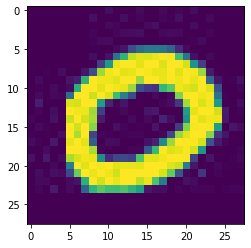

Prediction: 1.6112755160075336e-26 - Label: 0.0


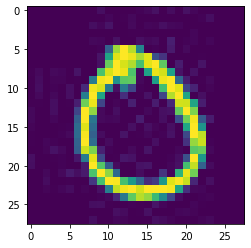

Prediction: 1.0 - Label: 1.0


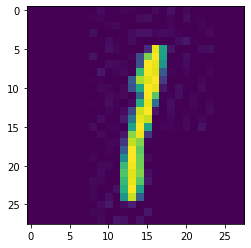

Prediction: 1.0 - Label: 1.0


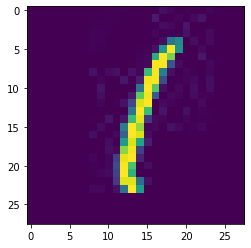

Prediction: 1.5654411187141948e-19 - Label: 0.0


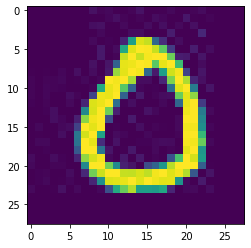

In [150]:
# Lets take a look at some predictions for fun
for i in range(5):
    print(f'Prediction: {pred[i].item()} - Label: {labels[indexes][i].item()}')
    plt.imshow(images[indexes][i].view(28, 28))
    plt.show()


# 10 Classes

Converting our loop to deal with 10 classes will be rather easy, just expand the last weights and biases to have 10 outputs

In [151]:
images = torch.load('datasets/mnist_images_10.pt')/255
images = images.view(-1, 28*28)

labels = torch.load('datasets/mnist_labels_10.pt')

In [152]:
# let's take a look at 10 random labels

random_indexes = torch.randint(0, images.shape[0], (10,))
print(labels[random_indexes]) 
# we cant train on this, we need a different 0-1 label for each class

labels = F.one_hot(labels.long(), 10).float()
print(labels[random_indexes])
# This is the one-hot encoding of the labels (simplest form of embedding)
# In which we have a 1 at the index of the class and 0s everywhere else

tensor([8., 6., 4., 2., 7., 7., 0., 7., 4., 5.])
tensor([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]])


In [153]:
hidden_size = 128

w1 = torch.randn(784, hidden_size).requires_grad_()
b1 = torch.randn(hidden_size).requires_grad_()
w2 = torch.randn(hidden_size, 10).requires_grad_()  # 10 classes
b2 = torch.randn(10).requires_grad_()  # 10 classes

epochs = 3000
lr = 1e-2
batch_size = 1024
lossi = []

for epoch in range(epochs):
    indexes = torch.randint(0, images.shape[0], (batch_size,))
    
    h1 = F.gelu(images[indexes] @ w1 + b1)  
    pred = F.softmax(h1 @ w2 + b2, dim=1)  # Softmax is the best activation function for multi-class classification
    loss = F.mse_loss(pred, labels[indexes]) 
    lossi.append(loss.item())
    loss.backward()

    with torch.no_grad():
        for p in [w1, b1, w2, b2]:  
            p -= lr * p.grad
            p.grad = None

    if epoch % (epochs//10) == 0:
        print(f'Epoch {epoch}/{epochs} - Loss: {loss.item()} - Accuracy: {round(((pred.argmax(dim=1) == labels[indexes].argmax(dim=1)).sum().item()/len(labels[indexes]))*100)}%')

Epoch 0/3000 - Loss: 0.16946208477020264 - Accuracy: 15%


Epoch 300/3000 - Loss: 0.16634245216846466 - Accuracy: 16%
Epoch 600/3000 - Loss: 0.17067426443099976 - Accuracy: 14%
Epoch 900/3000 - Loss: 0.16977354884147644 - Accuracy: 15%
Epoch 1200/3000 - Loss: 0.1677853912115097 - Accuracy: 15%
Epoch 1500/3000 - Loss: 0.16889068484306335 - Accuracy: 15%
Epoch 1800/3000 - Loss: 0.1683022826910019 - Accuracy: 15%
Epoch 2100/3000 - Loss: 0.16924135386943817 - Accuracy: 15%
Epoch 2400/3000 - Loss: 0.1638798713684082 - Accuracy: 17%
Epoch 2700/3000 - Loss: 0.16740448772907257 - Accuracy: 16%


This isnt working right. Let's look at some predictions

In [154]:
print(pred[:5])


tensor([[0.0000e+00, 1.4129e-35, 0.0000e+00, 4.1373e-41, 1.1447e-25, 8.8529e-40,
         2.4319e-20, 9.9995e-01, 5.2967e-05, 6.2023e-34],
        [0.0000e+00, 5.3411e-14, 3.1000e-40, 8.9441e-08, 3.5302e-23, 1.3312e-43,
         1.0000e+00, 0.0000e+00, 9.1522e-10, 2.8691e-11],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 5.5174e-18, 1.0000e+00, 0.0000e+00,
         0.0000e+00, 1.3294e-41, 2.1269e-08, 7.8964e-28],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00]],
       grad_fn=<SliceBackward0>)


# Initialization

By inspecting closely the values at the start of the training run, we clearly see that they are way too high (The model predicts with 100% confidence the wrong classes) <br>

Now, let's explore out options: 
- We could obviously just ignore this problem and let the optimization deal with it as we did until this problem, but as you can see that idea doesn't scale well with big models
- We could simply reduce the starting values of weights and biases, specifically we will reduce their values by the square root of the layer dimension (Xavier initialization)
- We could normalize the values in each layer such that mean is zero and standard deviation is one

Let's try out 

In [155]:
hidden_size = 128

w1 = torch.randn(784, hidden_size).requires_grad_()
b1 = torch.randn(hidden_size).requires_grad_()
w2 = torch.randn(hidden_size, 10).requires_grad_()  # 10 classes
b2 = torch.randn(10).requires_grad_()  # 10 classes

with torch.no_grad():
    for p in [w1, b1, w2, b2]:
        p /= p.shape[0]**0.5  # Xavier initialization

epochs = 3000
lr = 1e-2
batch_size = 1024
lossi = []

for epoch in range(epochs):
    indexes = torch.randint(0, images.shape[0], (batch_size,))
    
    h1 = F.tanh(images[indexes] @ w1 + b1)  
    pred = F.softmax(h1 @ w2 + b2, dim=1)  # Softmax is the best activation function for multi-class classification
    loss = F.mse_loss(pred, labels[indexes]) 
    lossi.append(loss.item())
    loss.backward()

    with torch.no_grad():
        for p in [w1, b1, w2, b2]:  
            p -= lr * p.grad
            p.grad = None

    if epoch % (epochs//10) == 0:
        print(f'Epoch {epoch}/{epochs} - Loss: {loss.item()} - Accuracy: {round(((pred.argmax(dim=1) == labels[indexes].argmax(dim=1)).sum().item()/len(labels[indexes]))*100)}%')

Epoch 0/3000 - Loss: 0.09213361144065857 - Accuracy: 9%
Epoch 300/3000 - Loss: 0.09026812016963959 - Accuracy: 12%
Epoch 600/3000 - Loss: 0.08895603567361832 - Accuracy: 20%
Epoch 900/3000 - Loss: 0.0872754454612732 - Accuracy: 27%
Epoch 1200/3000 - Loss: 0.08567635715007782 - Accuracy: 37%
Epoch 1500/3000 - Loss: 0.08463037014007568 - Accuracy: 39%
Epoch 1800/3000 - Loss: 0.08277256786823273 - Accuracy: 43%
Epoch 2100/3000 - Loss: 0.08054827153682709 - Accuracy: 45%
Epoch 2400/3000 - Loss: 0.07857920229434967 - Accuracy: 46%
Epoch 2700/3000 - Loss: 0.07615964114665985 - Accuracy: 51%


Prediction: 4 - Confidence 24.099999999999998% - Label: 9


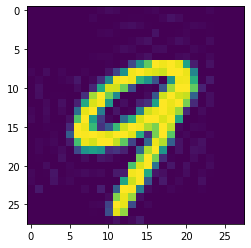

Prediction: 2 - Confidence 30.2% - Label: 2


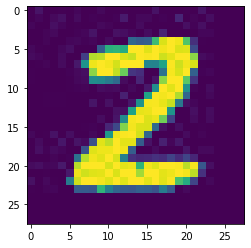

Prediction: 1 - Confidence 33.7% - Label: 1


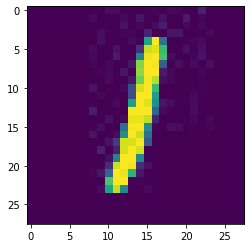

Prediction: 6 - Confidence 18.099999999999998% - Label: 0


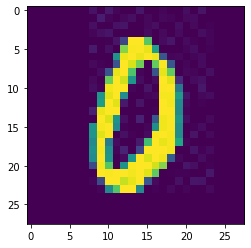

Prediction: 0 - Confidence 42.4% - Label: 0


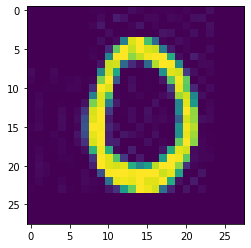

In [156]:
# Lets take a look at some predictions for fun
for i in range(5):
    print(f'Prediction: {pred[i].argmax()} - Confidence {round(pred[i, pred[i].argmax()].item(), 3)*100}% - Label: {labels[indexes][i].argmax().item()}')
    plt.imshow(images[indexes][i].view(28, 28))
    plt.show()
